In [110]:
import pandas as pd
club_games = pd.read_csv('/home/becode/Desktop/5#StoryTelling/data/club_games.csv')


In [111]:
club_games.dtypes

club_id                   int64
game_id                   int64
own_goals                 int64
own_position              int64
own_manager_name         object
opponent_id               int64
opponent_goals            int64
opponent_position         int64
opponent_manager_name    object
hosting                  object
is_win                    int64
dtype: object

In [112]:
club_games_chunck = club_games[['club_id','game_id', 'hosting', 'is_win']]
club_games_chunck

,club_id,game_id,hosting,is_win
0,27,2229332,Home,1
1,131,2244388,Home,1
2,3709,2269557,Home,0
3,21322,2254432,Home,1
4,109,2221759,Home,0
...,...,...,...,...
123091,279,3899401,Away,0
123092,429,3901620,Away,0
123093,3258,3899381,Away,0
123094,2481,3899383,Away,0


In [113]:
club_games_chunck['is_win'].value_counts()

0    74851
1    48245
Name: is_win, dtype: int64

In [114]:
appearance = pd.read_csv('/home/becode/Desktop/5#StoryTelling/data/appearances.csv')
#appearance['new_calc']=appearance.apply(lambda row: row.yellow_cards + row.red_cards , axis=1)
appearance.describe()


,game_id,player_id,player_club_id,player_current_club_id,yellow_cards,red_cards,goals,assists,minutes_played
count,1.166215e+06,1.166215e+06,1.166215e+06,1.166215e+06,1.166215e+06,1.166215e+06,1.166215e+06,1.166215e+06,1.166215e+06
mean,3.098286e+06,1.906905e+05,2.858970e+03,3.300416e+03,1.488602e-01,3.616829e-03,9.679090e-02,7.357991e-02,6.976547e+01
std,4.435312e+05,1.572813e+05,6.909196e+03,8.355203e+03,3.672712e-01,6.003125e-02,3.328494e-01,2.817264e-01,2.972476e+01
min,-1.000000e+00,1.000000e+01,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.700926e+06,6.157300e+04,2.810000e+02,3.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.300000e+01
50%,3.069978e+06,1.495320e+05,8.550000e+02,8.680000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
75%,3.450678e+06,2.783430e+05,2.441000e+03,2.578000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+01
max,4.055287e+06,1.110406e+06,8.367800e+04,8.367800e+04,2.000000e+00,1.000000e+00,6.000000e+00,6.000000e+00,1.200000e+02


In [115]:
appearance_chunk = appearance[['game_id', 'player_id', 'red_cards', 'yellow_cards', 'competition_id']]

In [116]:
new_table = appearance_chunk[appearance_chunk['competition_id']=='BE1']

In [117]:
merge_tables = pd.merge(new_table, club_games,on='game_id')

In [118]:
merge_tables.head()

,game_id,player_id,red_cards,yellow_cards,competition_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2479873,73846,0,1,BE1,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0
1,2479873,73846,0,1,BE1,3057,3,1,Guy Luzon,601,2,13,Yves Vanderhaeghe,Away,1
2,2479873,111061,0,0,BE1,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0
3,2479873,111061,0,0,BE1,3057,3,1,Guy Luzon,601,2,13,Yves Vanderhaeghe,Away,1
4,2479873,132764,0,0,BE1,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0


In [119]:
merge_tables.groupby('game_id').sum(numeric_only=True)

,player_id,red_cards,yellow_cards,club_id,own_goals,own_position,opponent_id,opponent_goals,opponent_position,is_win
game_id,,,,,,,,,,
2469866,5480600,0,6,90412,84,476,90412,84,476,28
2469867,5448474,0,2,865900,56,560,865900,56,560,28
2469868,5083320,0,6,18279,0,459,18279,0,459,0
2469869,6044394,0,8,82755,54,486,82755,54,486,27
2469870,5016458,0,8,39582,27,459,39582,27,459,27
...,...,...,...,...,...,...,...,...,...,...
3851357,25950728,0,4,199890,90,600,199890,90,600,30
3851358,22196878,0,4,15841,62,527,15841,62,527,0
3851359,21805698,0,12,94250,0,348,94250,0,348,0


Sum all cards

In [120]:
merge_tables[['red_cards', 'yellow_cards']].sum()

red_cards         620
yellow_cards    18860
dtype: int64

In [121]:
merge_tables['yellow_cards'].value_counts()

0    111188
1     17708
2       576
Name: yellow_cards, dtype: int64

In [122]:
merge_tables['red_cards'].value_counts()

0    128852
1       620
Name: red_cards, dtype: int64

In [123]:
players = pd.read_csv('/home/becode/Desktop/5#StoryTelling/data/players.csv')
players = players[['player_id','current_club_id', 'image_url']]
merge_tables_players = pd.merge(merge_tables, players, on='player_id')
merge_tables_players

,game_id,player_id,red_cards,yellow_cards,competition_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,current_club_id,image_url
0,2479873,73846,0,1,BE1,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0,2293,https://img.a.transfermarkt.technology/portrai...
1,2479873,73846,0,1,BE1,3057,3,1,Guy Luzon,601,2,13,Yves Vanderhaeghe,Away,1,2293,https://img.a.transfermarkt.technology/portrai...
2,2479885,73846,0,0,BE1,3057,0,5,Guy Luzon,157,1,2,Hein Vanhaezebrouck,Home,0,2293,https://img.a.transfermarkt.technology/portrai...
3,2479885,73846,0,0,BE1,157,1,2,Hein Vanhaezebrouck,3057,0,5,Guy Luzon,Away,1,2293,https://img.a.transfermarkt.technology/portrai...
4,2486389,73846,0,0,BE1,29228,5,5,Rachid Chihab,3057,2,7,Guy Luzon,Home,1,2293,https://img.a.transfermarkt.technology/portrai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129467,3851214,565016,0,0,BE1,3057,4,6,Ronny Deila,3948,2,2,Karel Geraerts,Away,1,3057,https://img.a.transfermarkt.technology/portrai...
129468,3851299,429931,0,0,BE1,2282,2,4,Scott Parker,157,0,5,Hein Vanhaezebrouck,Home,1,157,https://img.a.transfermarkt.technology/portrai...
129469,3851299,429931,0,0,BE1,157,0,5,Hein Vanhaezebrouck,2282,2,4,Scott Parker,Away,0,157,https://img.a.transfermarkt.technology/portrai...
129470,3851119,283580,0,0,BE1,3057,2,6,Ronny Deila,968,0,7,Jonas De Roeck,Home,1,968,https://img.a.transfermarkt.technology/portrai...


In [129]:
merge_tables_players['yellow_cards'].value_counts()

1    34
Name: yellow_cards, dtype: int64

In [127]:
merge_players = (merge_tables_players['red_cards']>0) & (merge_tables_players['yellow_cards']>0)
merge_tables_players = merge_tables_players[merge_players]
merge_tables_players.head()

,game_id,player_id,red_cards,yellow_cards,competition_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,current_club_id,image_url
3788,2668500,4742,1,1,BE1,601,1,8,Karim Belhocine,3508,0,7,Francky Dury,Home,1,2715,https://img.a.transfermarkt.technology/portrai...
3789,2668500,4742,1,1,BE1,3508,0,7,Francky Dury,601,1,8,Karim Belhocine,Away,0,2715,https://img.a.transfermarkt.technology/portrai...
18714,3598211,193469,1,1,BE1,1096,1,3,Brian Priske,2282,1,2,Philippe Clement,Home,0,1096,https://img.a.transfermarkt.technology/portrai...
18715,3598211,193469,1,1,BE1,2282,1,2,Philippe Clement,1096,1,3,Brian Priske,Away,0,1096,https://img.a.transfermarkt.technology/portrai...
32602,2732168,29894,1,1,BE1,58,1,1,René Weiler,498,0,12,Georges Leekens,Home,1,29228,https://img.a.transfermarkt.technology/portrai...


In [103]:
merge_tables_players['sum_cards'] = merge_tables_players['yellow_cards']+merge_tables_players['red_cards']

In [107]:
merge_tables_players.sort_values(by='sum_cards', ascending=False)

,game_id,player_id,red_cards,yellow_cards,competition_id,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win,current_club_id,image_url,sum_cards
16301,2503753,297070,0,2,BE1,204,0,14,Slavisa Stojanovic,1184,3,5,Alex McLeish,Away,0,273,https://img.a.transfermarkt.technology/portrai...,2
30283,3237860,96454,0,2,BE1,601,1,9,Yves Vanderhaeghe,3057,2,1,Michel Preud'homme,Away,0,3057,https://img.a.transfermarkt.technology/portrai...,2
27249,2640919,141828,0,2,BE1,2861,1,4,Yves Vanderhaeghe,58,1,3,Besnik Hasi,Away,0,995,https://img.a.transfermarkt.technology/portrai...,2
79729,3851246,150482,0,2,BE1,3057,1,6,Ronny Deila,1096,4,3,Mark van Bommel,Away,0,3057,https://img.a.transfermarkt.technology/portrai...,2
47801,2653911,276896,0,2,BE1,601,1,10,Karim Belhocine,172,1,6,Felice Mazzù,Away,0,244,https://img.a.transfermarkt.technology/portrai...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46669,2635124,261963,0,0,BE1,29228,0,12,Cedomir Janevski,58,2,2,Besnik Hasi,Away,0,1420,https://img.a.transfermarkt.technology/portrai...,0
46668,2635124,261963,0,0,BE1,58,2,2,Besnik Hasi,29228,0,12,Cedomir Janevski,Home,1,1420,https://img.a.transfermarkt.technology/portrai...,0
46667,2648381,261963,0,0,BE1,29228,0,14,Cedomir Janevski,3057,3,8,Yannick Ferrera,Away,0,1420,https://img.a.transfermarkt.technology/portrai...,0
46666,2648381,261963,0,0,BE1,3057,3,8,Yannick Ferrera,29228,0,14,Cedomir Janevski,Home,1,1420,https://img.a.transfermarkt.technology/portrai...,0


In [10]:
new_table = pd.merge(new_table, merge_tables,on='game_id', right_on='game_id')
len(new_table)

129472

In [ ]:
new_table_test = pd.concat(new_table, club_games,left_on='game_id', right_on='game_id')
len(new_table)

In [11]:
new_table.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,...,club_id,own_goals,own_position,own_manager_name,opponent_id,opponent_goals,opponent_position,opponent_manager_name,hosting,is_win
0,2479873_73846,2479873,73846,3057,2293,2014-08-02,Paul-José Mpoku,BE1,1,0,...,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0
1,2479873_73846,2479873,73846,3057,2293,2014-08-02,Paul-José Mpoku,BE1,1,0,...,3057,3,1,Guy Luzon,601,2,13,Yves Vanderhaeghe,Away,1
2,2479873_111061,2479873,111061,601,7179,2014-08-02,Alassane També,BE1,0,0,...,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0
3,2479873_111061,2479873,111061,601,7179,2014-08-02,Alassane També,BE1,0,0,...,3057,3,1,Guy Luzon,601,2,13,Yves Vanderhaeghe,Away,1
4,2479873_132764,2479873,132764,3057,465,2014-08-02,Tony Watt,BE1,0,0,...,601,2,13,Yves Vanderhaeghe,3057,3,1,Guy Luzon,Home,0


In [12]:

players = pd.read_csv('/home/becode/Desktop/5#StoryTelling/data/players.csv')
new_table = pd.merge(new_table, players,left_on='player_id', right_on='player_id')


In [13]:
new_table.dtypes

appearance_id                            object
game_id                                   int64
player_id                                 int64
player_club_id                            int64
player_current_club_id                    int64
date                                     object
player_name                              object
competition_id                           object
yellow_cards                              int64
red_cards                                 int64
goals                                     int64
assists                                   int64
minutes_played                            int64
club_id                                   int64
own_goals                                 int64
own_position                              int64
own_manager_name                         object
opponent_id                               int64
opponent_goals                            int64
opponent_position                         int64
opponent_manager_name                   

In [14]:
new_table_full = new_table[new_table['red_cards']>0]
len(new_table_full)

620

In [15]:
new_calc = new_table_full.groupby('player_name')['red_cards'].sum().sort_values(ascending=False)
print(new_calc)

player_name
Birger Verstraete    10
Nana Asare            6
Jordi Amat            6
Clément Tainmont      6
Thibault De Smet      6
                     ..
Igor Plastun          2
Isaac Mbenza          2
Ishak Belfodil        2
Ishaq Abdulrazak      2
Óscar Duarte          2
Name: red_cards, Length: 256, dtype: int64


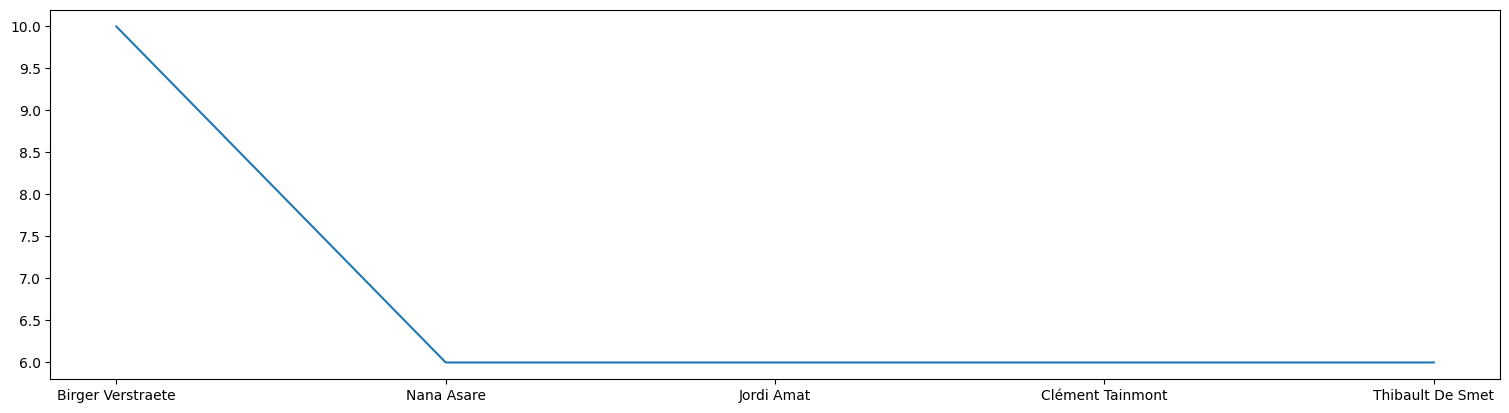

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_figwidth(18.7)
ax.plot(new_calc.keys()[:5], new_calc.values[:5])

plt.show()

In [18]:
new_table_yellow = new_table[new_table['yellow_cards']>0]
len(new_table_yellow)
new_table_yellow = new_table_yellow.groupby('player_name')['yellow_cards'].sum().sort_values(ascending=False)
new_table_yellow.head(20)

player_name
Kevin Vandendriessche     106
Marco Ilaimaharitra       104
Noë Dussenne              104
Damien Marcq               92
Kristof D'Haene            86
Hannes Van Der Bruggen     82
Julien De Sart             80
Birger Verstraete          80
Stef Peeters               78
Sven Kums                  78
Clinton Mata               76
Faris Haroun               76
Selim Amallah              72
Siebe Blondelle            66
Ruud Vormer                66
Nana Asare                 64
Frank Boya                 64
Joachim Van Damme          64
Zarko Tomasevic            64
Adrien Trébel              64
Name: yellow_cards, dtype: int64

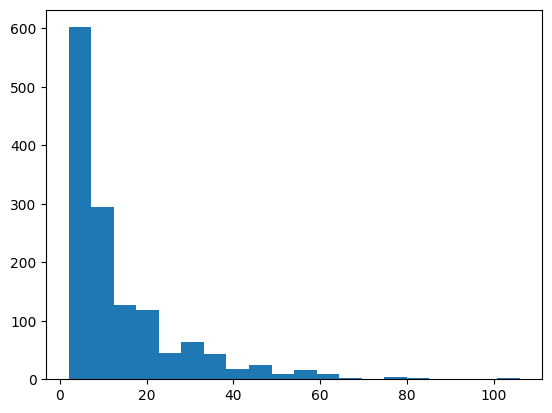

In [19]:
import matplotlib.pyplot as plt

plt.hist(new_table_yellow, bins=20)
plt.show()

In [20]:
new_table_full = new_table[(new_table['red_cards']>0) & (new_table['yellow_cards']>0)]
len(new_table_full)

34

In [21]:
new_calc = new_table.groupby('player_name')[['yellow_cards','red_cards']].sum().sort_values(by=['yellow_cards','red_cards'], ascending=False)
print(new_calc)

                       yellow_cards  red_cards
player_name                                   
Kevin Vandendriessche           106          2
Marco Ilaimaharitra             104          4
Noë Dussenne                    104          4
Damien Marcq                     92          4
Kristof D'Haene                  86          4
...                             ...        ...
Yves Lenaerts                     0          0
Zakaria M'Sila                    0          0
Zeno Van Den Bosch                0          0
Zout                              0          0
Élie Youan                        0          0

[1794 rows x 2 columns]


In [23]:
new_table_full.groupby(['yellow_cards','red_cards','player_name']).value_counts(sort=True, ascending=False, subset=['minutes_played']).head()


yellow_cards  red_cards  player_name         minutes_played
1             1          Anton Tanghe        39                2
                         Björn Engels        82                2
                         Borja López         85                2
                         Calvin Stengs       62                2
                         Christophe Lepoint  55                2
dtype: int64

In [25]:

new_group_away = new_table[new_table['hosting']=='Away']
new_group = new_group_away.groupby(['yellow_cards','red_cards']).sum(numeric_only=True).value_counts()
new_group

game_id       player_id    player_club_id  player_current_club_id  goals  assists  minutes_played  club_id    own_goals  own_position  opponent_id  opponent_goals  opponent_position  is_win  current_club_id  height_in_cm  market_value_in_eur  highest_market_value_in_eur  last_season
55265447      3736041      79969           121878                  1      0        1174            54910      22         153           109815       27              138                4       121878           3134          2.302500e+07         7.220000e+07                 34351          1
888505341     66653829     1248476         993680                  25     23       19818           1224686    370        2647          1264884      481             2448               87      993680           52425         6.383250e+08         1.318450e+09                 581884         1
930048369     73126677     1418439         1143043                 8      12       14141           1246354    401        2625          142

In [26]:
new_group.dtypes

dtype('int64')

In [27]:

new_group_home = new_table[new_table['hosting']=='Home']
new_group = new_group_home.groupby(['yellow_cards','red_cards']).sum(numeric_only=True).value_counts()


In [28]:
new_group = new_table.groupby(['yellow_cards','red_cards'])
new_group.sum(numeric_only=True).value_counts()

game_id       player_id    player_club_id  player_current_club_id  goals  assists  minutes_played  club_id    own_goals  own_position  opponent_id  opponent_goals  opponent_position  is_win  current_club_id  height_in_cm  market_value_in_eur  highest_market_value_in_eur  last_season
110530894     7472082      159938          243756                  2      0        2348            164725     49         291           164725       49              291                11      243756           6268          4.605000e+07         1.444000e+08                 68702          1
1777010682    133307658    2496952         1987360                 50     46       39636           2489570    851        5095          2489570      851             5095               226     1987360          104850        1.276650e+09         2.636900e+09                 1163768        1
1860096738    146253354    2836878         2286086                 16     24       28282           2673573    888        5348          267

In [34]:
new_group.mean(numeric_only=True).value_counts()

game_id       player_id      player_club_id  player_current_club_id  goals     assists   minutes_played  club_id      own_goals  own_position  opponent_id  opponent_goals  opponent_position  is_win    current_club_id  height_in_cm  market_value_in_eur  highest_market_value_in_eur  last_season
3.085088e+06  231436.906250  4334.986111     3450.277778             0.086806  0.079861  68.812500       4322.170139  1.477431   8.845486      4322.170139  1.477431        8.845486           0.392361  3450.277778      182.031250    2.648651e+06         4.577951e+06                 2020.430556    1
3.149107e+06  231355.600769  4767.878805     3628.158312             0.105805  0.081362  79.017653       4464.882143  1.425314   8.855720      4464.882143  1.425314        8.855720           0.375014  3628.158312      181.016861    2.308702e+06         4.122044e+06                 2020.494964    1
3.161945e+06  235195.524439  4365.778232     3495.530497             0.099420  0.075134  68.974322       442

In [30]:
new_table_players = new_table[new_table['hosting']=='Home']
len(new_table_players)

64736

In [31]:
new_table_players_away = new_table[new_table['hosting']=='Away']
len(new_table_players_away)

64736

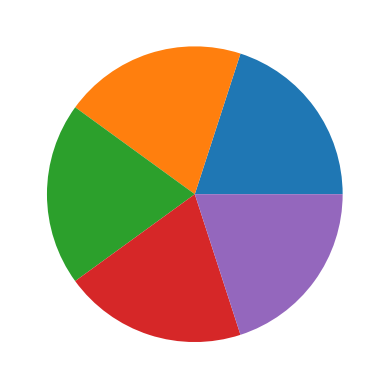

In [33]:
import matplotlib.pyplot as plt
plt.pie(new_group.mean(numeric_only=True).value_counts(normalize=True))

plt.show()